In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,5]
import tarfile
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer 
from collections import defaultdict
import glob

import numpy as np
import os
import glob
import seaborn as sns 
sns.set()
np.set_printoptions(linewidth=110)
pd.set_option('display.max_colwidth', 40)

LOCAL_PATH = "RACE/train/"

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('names')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gersa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gersa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\gersa\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gersa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gersa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
#pattern = os.path.join(LOCAL_PATH + "middle",'*.txt')
files = glob.glob("RACE/train/*/*.txt")
#files = glob.glob(pattern)
#pattern = os.path.join(LOCAL_PATH + "high",'*.txt')
#files += glob.glob(pattern)

In [7]:
dfs = [] # an empty list to store the data frames
for file in files:
    data = pd.read_json(file) # read data frame from json file
    dfs.append(data) # append the data frame to the list

In [8]:
df = pd.concat(dfs, ignore_index=True).drop("id", axis=1) # concatenate all the data frames in the list.
df.sample(5) ## middle tail is weird

,answers,options,questions,article
64203,D,"[Your family, Many people, Nobody, T...",can help you plan your holiday.,Many people like traveling during th...
78486,B,"[red, black, green, white]",The pen is _ .,Look at this. It's a pencil case. It...
58781,A,"[mindless, skillful, thoughtful, tir...","While taking notes, laptop users ten...",A new study shows students who write...
37343,C,"[He was all for it., He was strongly...",What was his father's response when ...,When Nathan Winograd announced that ...
28010,A,"[Technology., Travel., Environment.,...",In which section of a newspaper can ...,Marvin Minsky is often called the Fa...


## EDA: ARTICLES

In [9]:
articles = df["article"].drop_duplicates()

In [10]:
print("Number of unique articles: %s\nTotal number of articles: %s" %(len(articles), len(df["article"])))

Number of unique articles: 25135
Total number of articles: 87866


In [11]:
def lexical_diversity(text):
    return len(set(text)) / len(text)
lex_div = []
for item in articles:
    item  = word_tokenize(item)
    lex_div.append(lexical_diversity(item))

In [18]:
stop_words = set(stopwords.words('english'))  

In [19]:
fdist = FreqDist()
for item in articles:
    for token in word_tokenize(item):
        if (token.lower() not in stop_words) and token.isalpha():
            fdist[token.lower()] += 1
print("Vocabulary size: %s\nAverage lexical Diversity: %s " %(len(fdist), np.mean(lex_div) ))

Vocabulary size: 63138
Average lexical Diversity: 0.5296101897082283 


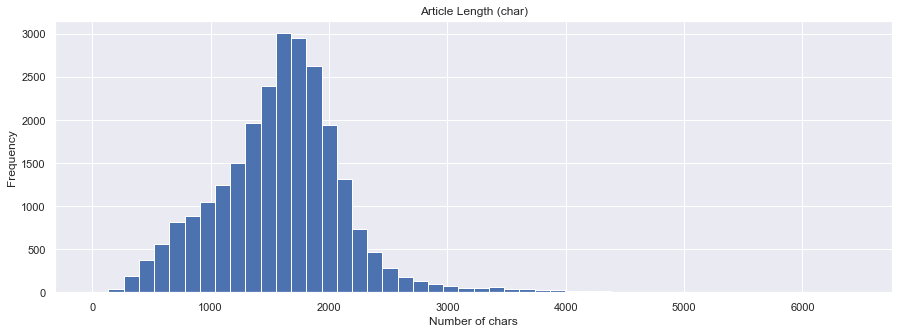

In [20]:
articles.apply(len).plot(kind="hist", bins=50)
plt.xlabel("Number of chars")
plt.title("Article Length (char)")
plt.show()

In [21]:
np.mean(articles.apply(len).values)


1592.0568927789934

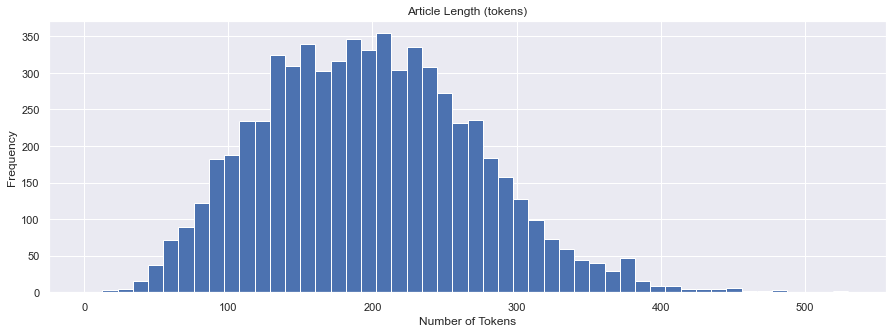

In [8]:
articles.apply(lambda x: len(x.split())).plot(kind="hist", bins=50)
plt.xlabel("Number of Tokens")
plt.title("Article Length (tokens)")
plt.show()

In [23]:
np.max(articles.apply(lambda x: len(x.split())).values)

1162

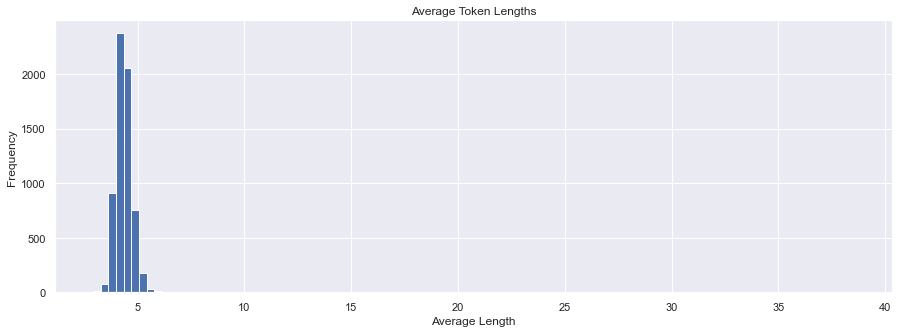

In [9]:
articles.apply(lambda x: np.mean([len(w) for w in x.split()])).plot(kind="hist", bins=100)
plt.xlabel("Average Length")
plt.title("Average Token Lengths")
plt.show()

In [10]:
stop_words = set(stopwords.words('english'))  
dict_stop = defaultdict(int)
for item in articles:
    for token in word_tokenize(item):
        if token in stop_words:
            dict_stop[token] += 1

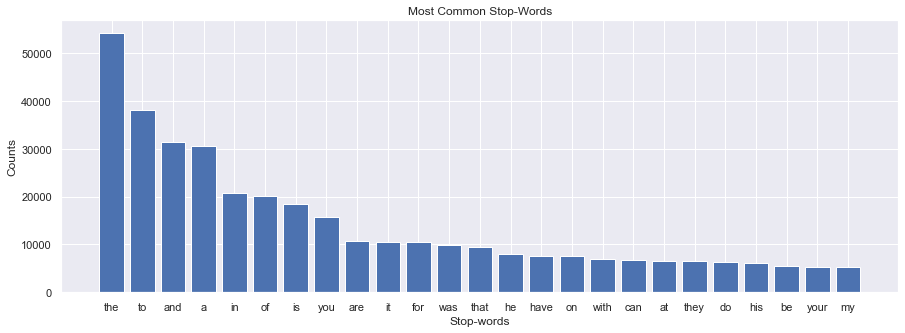

In [11]:
top = sorted(dict_stop.items(), key=lambda x:x[1],reverse=True)[:25] 
x,y = zip(*top)
plt.figure(figsize = (15,5))
plt.title("Most Common Stop-Words")
plt.xlabel("Stop-words")
plt.ylabel("Counts")
plt.bar(x,y)
plt.show()

In [12]:
fdist = FreqDist()
for item in articles:
    for token in word_tokenize(item):
        if (token.lower() not in stop_words) and token.isalpha():
            fdist[token.lower()] += 1

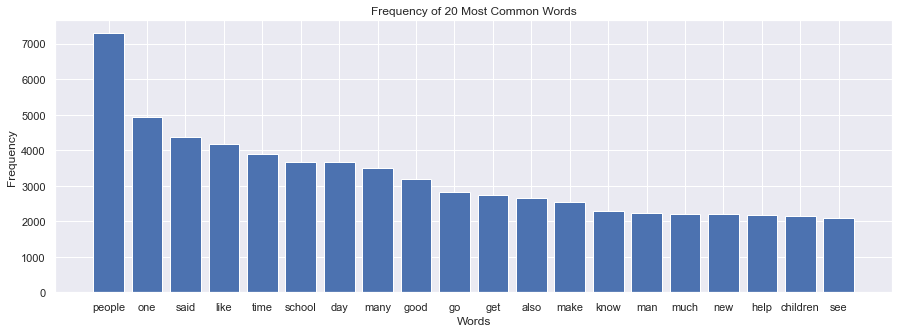

In [13]:
common = fdist.most_common(20)
x, y = zip(*common)
plt.bar(x, y)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of 20 Most Common Words')
plt.show()

In [14]:
lemmatizer = WordNetLemmatizer()
fdist = FreqDist()
for item in articles:
    for token in word_tokenize(item):
        if (token.lower() not in stop_words) and token.isalpha():
            token = lemmatizer.lemmatize(token.lower())
            fdist[token.lower()] += 1

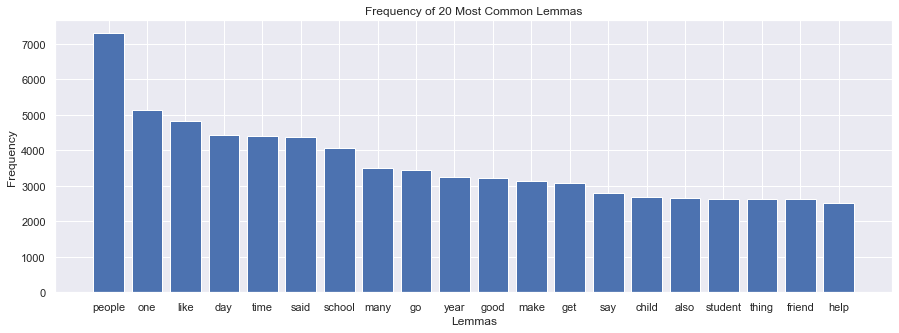

In [15]:
common = fdist.most_common(20)
x, y = zip(*common)
plt.bar(x, y)
plt.xlabel('Lemmas')
plt.ylabel('Frequency')
plt.title('Frequency of 20 Most Common Lemmas')
plt.show()

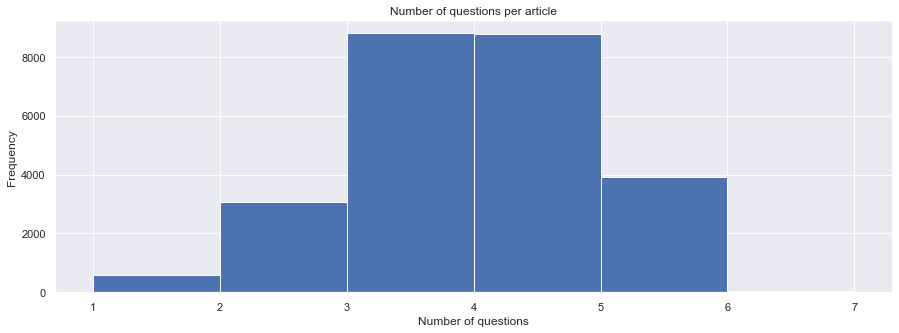

In [34]:
groupby = df[["article", "questions"]].groupby(["article"]).size().reset_index()
groupby.plot(kind="hist", legend=None, bins=6)
plt.title("Number of questions per article")
plt.xlabel("Number of questions")
plt.show()

In [35]:
np.mean(groupby.values)

TypeError: can only concatenate str (not "int") to str

# Questions

In [25]:
questions = df["questions"]

In [29]:
print("Total number of questions: %s" %len(questions))

Total number of questions: 25421


In [30]:
fdist = FreqDist()
for item in questions:
    for token in word_tokenize(item):
        if (token.lower() not in stop_words) and token.isalpha():
            fdist[token.lower()] += 1
print("Vocabulary size: %s" %len(fdist))

Vocabulary size: 7169


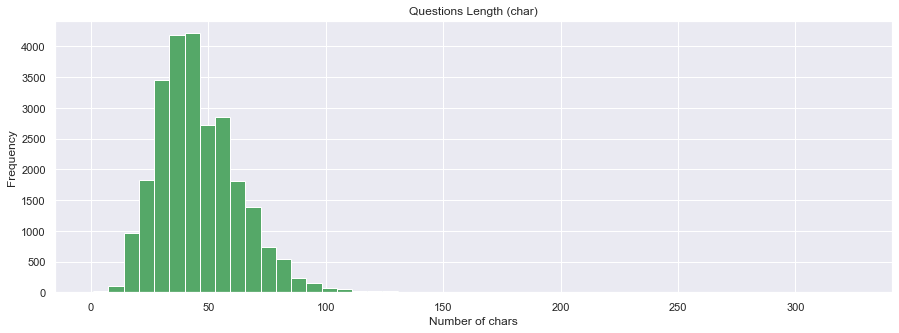

In [34]:
questions.apply(len).plot(kind="hist", bins=50, color='g')
plt.xlabel("Number of chars")
plt.title("Questions Length (char)")
plt.show()

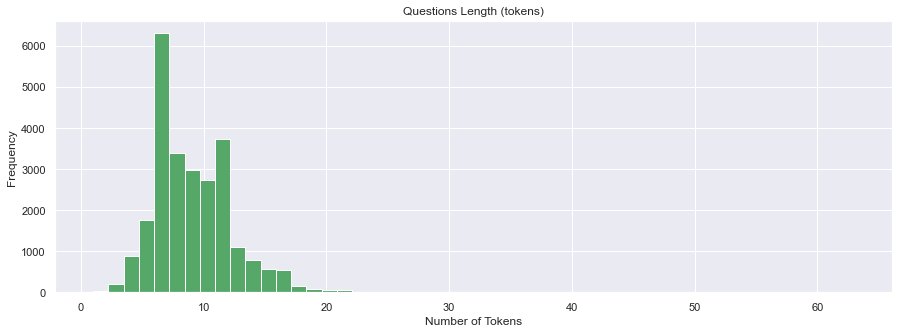

In [36]:
questions.apply(lambda x: len(x.split())).plot(kind="hist", bins=50, color="g")
plt.xlabel("Number of Tokens")
plt.title("Questions Length (tokens)")
plt.show()

In [27]:
np.max(questions.apply(lambda x: len(x.split())).values)

63

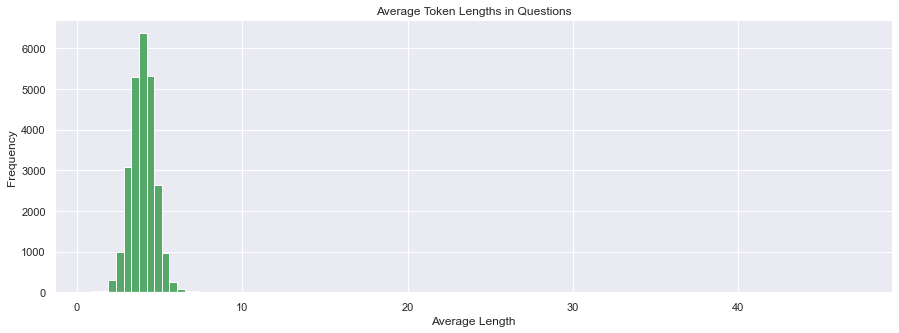

In [40]:
questions.apply(lambda x: np.mean([len(w) for w in x.split()])).plot(kind="hist", bins=100, color="g")
plt.xlabel("Average Length")
plt.title("Average Token Lengths in Questions")
plt.show()

In [41]:
stop_words = set(stopwords.words('english'))  
dict_stop = defaultdict(int)
for item in questions:
    for token in word_tokenize(item):
        if token in stop_words:
            dict_stop[token] += 1

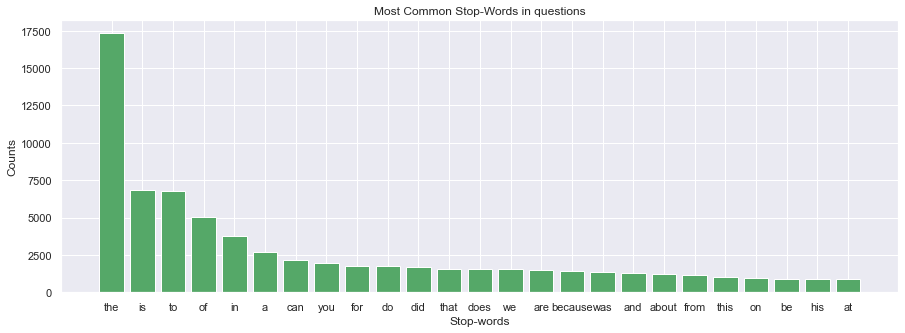

In [43]:
top = sorted(dict_stop.items(), key=lambda x:x[1],reverse=True)[:25] 
x,y = zip(*top)
plt.figure(figsize = (15,5))
plt.title("Most Common Stop-Words in questions")
plt.xlabel("Stop-words")
plt.ylabel("Counts")
plt.bar(x,y, color="g")
plt.show()

In [44]:
fdist = FreqDist()
for item in questions:
    for token in word_tokenize(item):
        if (token.lower() not in stop_words) and token.isalpha():
            fdist[token.lower()] += 1

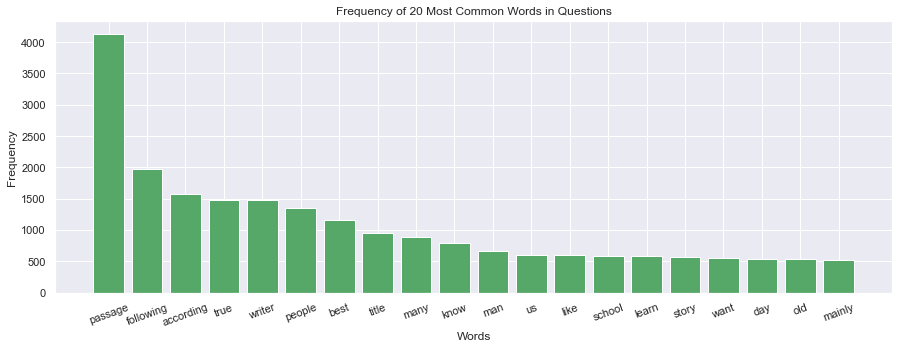

In [47]:
common = fdist.most_common(20)
x, y = zip(*common)
plt.bar(x, y, color="g")
plt.xlabel('Words')
plt.xticks(rotation=20)
plt.ylabel('Frequency')
plt.title('Frequency of 20 Most Common Words in Questions')
plt.show()

In [ ]:
pairs = df[["article", "questions"]]
intersection = []
for item in pairs.iterrows():
    art = [word.lower() for word in word_tokenize(item[1]["article"]) if word.lower() not in stop_words and word.isalpha()]
    ques = [word.lower() for word in word_tokenize(item[1]["questions"]) if word.lower() not in stop_words and word.isalpha()]
    intersection.append(len(set(art).intersection(ques)))

In [ ]:
inte

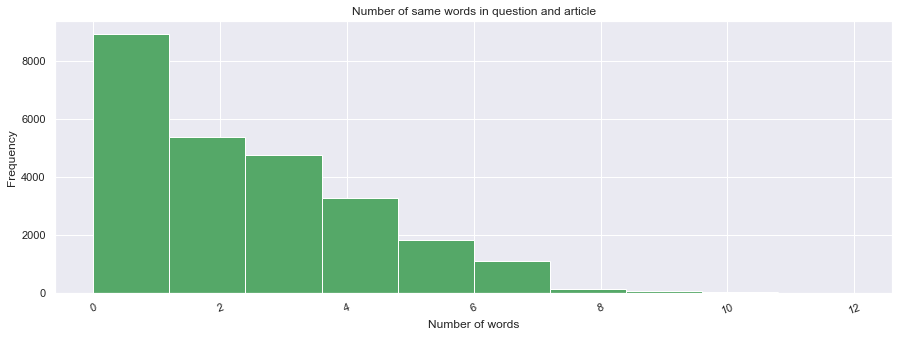

In [61]:
plt.hist(intersection,color="g")
plt.xlabel('Number of words')
plt.xticks(rotation=20)
plt.ylabel('Frequency')
plt.title('Number of same words in question and article')
plt.show()

# Answers

In [28]:
df_formated = pd.concat([df["options"].apply(pd.Series).rename(columns = {0: "A", 1:"B", 2:"C", 3:"D"}), df],axis = 1)\
                .drop("options", axis = 1)

In [29]:
df_formated.sample(5)

,A,B,C,D,answers,questions,article
82927,Because they have touched nearly eve...,Because men would not live happily w...,Because they are the only ways to sp...,Because no communication means no life.,A,Why does the passage say radio and T...,There are few families in the United...
38624,7,6,4,3,C,How many famous people mentioned in ...,World Book and Copyright Day is a an...
16667,About 80% of the children in the Sha...,About 45 percent of children suffer ...,About 540 million people are heavy s...,Children aged between 13 to 18 are m...,D,What can be inferred from the passage?,SHANGHAI - Health experts in Shangha...
12975,share an interesting shopping experi...,tell a story of a successful young s...,inspire people to go about their wor...,encourage sales people to become mor...,C,The writer wrote this article to _ .,One fine afternoon I was walking alo...
47896,is the most interesting book for chi...,White's only book written for children,is a good book not only for children...,is mainly about how animals get alon...,C,We learn from the passage that Charl...,Charlotte's Web by E.B. White is a c...


In [30]:
answers = pd.Series(np.concatenate([df_formated["A"].values, df_formated["B"].values, df_formated["C"].values, df_formated["D"].values]))

In [73]:
fdist = FreqDist()
for item in answers:
    for token in word_tokenize(item):
        if (token.lower() not in stop_words) and token.isalpha():
            fdist[token.lower()] += 1
print("Vocabulary size: %s" %len(fdist))

Vocabulary size: 10746


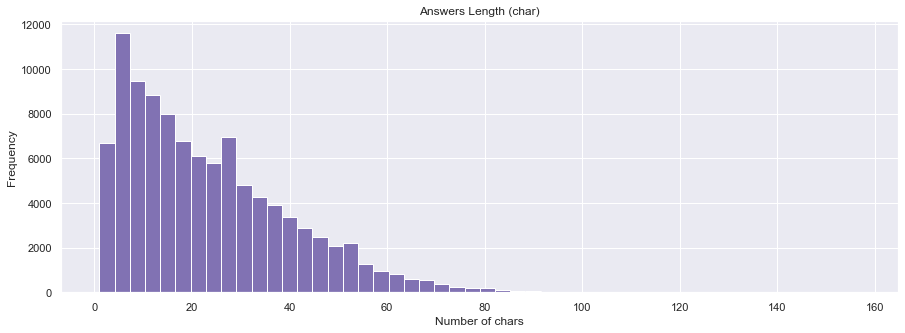

In [78]:
answers.apply(len).plot(kind="hist", bins=50, color="m")
plt.xlabel("Number of chars")
plt.title("Answers Length (char)")
plt.show()

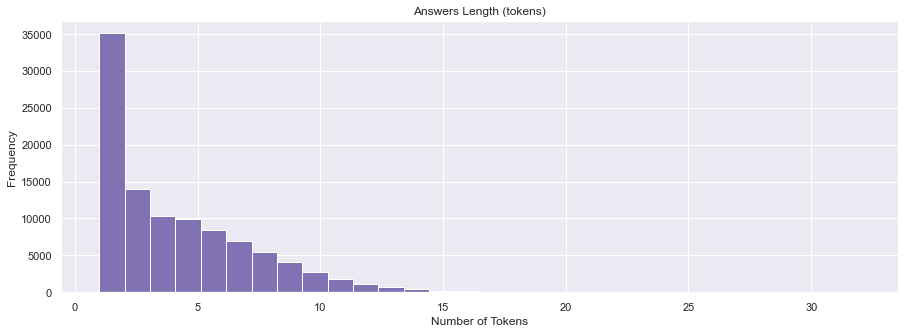

In [81]:
answers.apply(lambda x: len(x.split())).plot(kind="hist", bins=30, color="m")
plt.xlabel("Number of Tokens")
plt.title("Answers Length (tokens)")
plt.show()

In [32]:
np.max(answers.apply(lambda x: len(x.split())).values)

105

In [82]:
fdist = FreqDist()
for item in answers:
    for token in word_tokenize(item):
        if (token.lower() not in stop_words) and token.isalpha():
            fdist[token.lower()] += 1

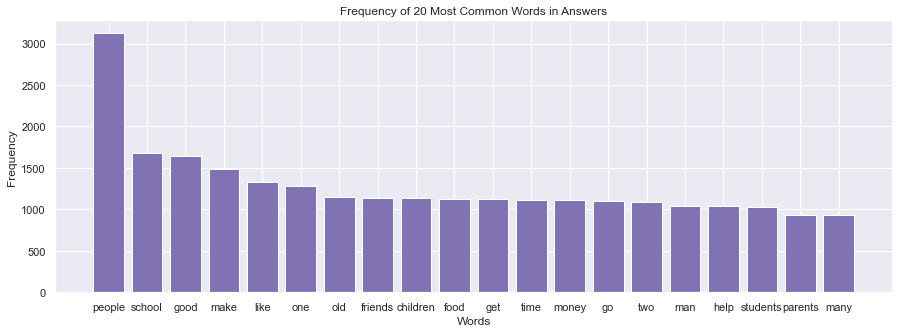

In [84]:
common = fdist.most_common(20)
x, y = zip(*common)
plt.bar(x, y, color="m")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of 20 Most Common Words in Answers')
plt.show()

# Archive (Old code)

In [72]:
with open(files[-1],"r") as file:
    raw = file.read()
    print(raw)


{"answers": ["C", "B", "C", "A", "A"], "options": [["Everyday", "Twiceaday", "Twiceaweek.", "Twiceamonth."], ["Becausetheyhavenotime.", "Becausetheythinkitisnoteasy.", "Becausetheydon'tliketoplaywiththeboys.", "Becausetheydon'tliketoexercise."], ["Everymorning.", "Everyafternoon", "Everyeveningbeforehegoestobed.", "Everyeveningbeforesupper"], ["Threetimesamonth.", "Threetimesaweek.", "Itisn'tmentionedinthepassage", "Hardlyever"], ["Becauseshedoesn'tliketoexercise.", "Becauseshelikestoeatjunkfoodverymuch.", "Becausesheeatstoomuchmeat,butdoesn'texercise.", "Becauseshedoesn'tliketoexercise,andshelikestoeatjunkfood."]], "questions": ["How often do most boys play basketball?", "Why do the girls dislike to play basketball?", "When does Tony often run for 30 minutes?", "How often does Gray swim in winter?", "Why is Sally so fat?"], "article": "There are 45 students in our class. I have made a survey, 36 students say they like to exercise. Most boys play basketball together twice a week. But g

In [71]:
raw

'{"answers": ["C", "B", "C", "A", "A"], "options": [["Everyday", "Twiceaday", "Twiceaweek.", "Twiceamonth."], ["Becausetheyhavenotime.", "Becausetheythinkitisnoteasy.", "Becausetheydon\'tliketoplaywiththeboys.", "Becausetheydon\'tliketoexercise."], ["Everymorning.", "Everyafternoon", "Everyeveningbeforehegoestobed.", "Everyeveningbeforesupper"], ["Threetimesamonth.", "Threetimesaweek.", "Itisn\'tmentionedinthepassage", "Hardlyever"], ["Becauseshedoesn\'tliketoexercise.", "Becauseshelikestoeatjunkfoodverymuch.", "Becausesheeatstoomuchmeat,butdoesn\'texercise.", "Becauseshedoesn\'tliketoexercise,andshelikestoeatjunkfood."]], "questions": ["How often do most boys play basketball?", "Why do the girls dislike to play basketball?", "When does Tony often run for 30 minutes?", "How often does Gray swim in winter?", "Why is Sally so fat?"], "article": "There are 45 students in our class. I have made a survey, 36 students say they like to exercise. Most boys play basketball together twice a week

In [39]:
df

,answers,options,questions,article,id
0,D,"[Help his mother., Watch TV., Wear his raincoat, Go out.]",What does Robbie want to do on the rainy day?,"Pit-a-pat. Pit-a-pat. It's raining. ""I want to go outside and play, Mum,"" Robbie says, ""When can the rain stop?"" His mum doesn't know what to say. She hopes the rain can stop, too. ""You can watch TV with me,"" she says. ""No, I just want to go outside."" ""1Put on your raincoat."" ""Does it stop raining?"" ""No, but you can go outside and play in the rain. Do you like that?"" ""Yes, mum."" He runs to his bedroom and puts on his red raincoat. ""Here you go. Go outside and play."" Mum opens the door and says. Robbie runs into the rain. Water goes 2here and there. Robbie's mum watches her son. He is having so much fun. ""Mum, come and play with me!"" Robbie calls. The door opens and his mum walks out. She is in her yellow raincoat. Mother and son are out in the rain for a long time. They play all kinds of games in the rain.",middle10.txt
1,A,"[happy, scary, dangerous, boring]",Robbie has a_day that day.,"Pit-a-pat. Pit-a-pat. It's raining. ""I want to go outside and play, Mum,"" Robbie says, ""When can the rain stop?"" His mum doesn't know what to say. She hopes the rain can stop, too. ""You can watch TV with me,"" she says. ""No, I just want to go outside."" ""1Put on your raincoat."" ""Does it stop raining?"" ""No, but you can go outside and play in the rain. Do you like that?"" ""Yes, mum."" He runs to his bedroom and puts on his red raincoat. ""Here you go. Go outside and play."" Mum opens the door and says. Robbie runs into the rain. Water goes 2here and there. Robbie's mum watches her son. He is having so much fun. ""Mum, come and play with me!"" Robbie calls. The door opens and his mum walks out. She is in her yellow raincoat. Mother and son are out in the rain for a long time. They play all kinds of games in the rain.",middle10.txt
2,B,"[The raincoat can stop the rain., The color of Robbie's raincoat is red., Robbie first watches with his Mum, Robbie's mum doesn't wear a raincoat in the rain.]",Which of the following is TRUE according to the passage?,"Pit-a-pat. Pit-a-pat. It's raining. ""I want to go outside and play, Mum,"" Robbie says, ""When can the rain stop?"" His mum doesn't know what to say. She hopes the rain can stop, too. ""You can watch TV with me,"" she says. ""No, I just want to go outside."" ""1Put on your raincoat."" ""Does it stop raining?"" ""No, but you can go outside and play in the rain. Do you like that?"" ""Yes, mum."" He runs to his bedroom and puts on his red raincoat. ""Here you go. Go outside and play."" Mum opens the door and says. Robbie runs into the rain. Water goes 2here and there. Robbie's mum watches her son. He is having so much fun. ""Mum, come and play with me!"" Robbie calls. The door opens and his mum walks out. She is in her yellow raincoat. Mother and son are out in the rain for a long time. They play all kinds of games in the rain.",middle10.txt
3,B,"[It's raining, Fun in the rain, Robbie and His mother, Robbie's raincoat]",Which is the best title for the passage?,"Pit-a-pat. Pit-a-pat. It's raining. ""I want to go outside and play, Mum,"" Robbie says, ""When can the rain stop?"" His mum doesn't know what to say. She hopes the rain can stop, too. ""You can watch TV with me,"" she says. ""No, I just want to go outside."" ""1Put on your raincoat."" ""Does it stop raining?"" ""No, but you can go outside and play in the rain. Do you like that?"" ""Yes, mum."" He runs to his bedroom and puts on his red raincoat. ""Here you go. Go outside and play."" Mum opens the door and says. Robbie runs into the rain. Water goes 2here and there. Robbie's mum watches her son. He is having so much fun. ""Mum, come and play with me!"" Robbie calls. The door opens and his mum walks out. She is in her yellow raincoat. Mother and son are out in the rain for a long time. They play all kinds of games in the rain.",middle10.txt


In [26]:
with open("RACE/train/middle/10.txt") as file:
    print(file.read())

{"answers": ["D", "A", "B", "B"], "options": [["Help his mother.", "Watch TV.", "Wear his raincoat", "Go out."], ["happy", "scary", "dangerous", "boring"], ["The raincoat can stop the rain.", "The color of Robbie's raincoat is red.", "Robbie first watches with his Mum", "Robbie's mum doesn't wear a raincoat in the rain."], ["It's raining", "Fun in the rain", "Robbie and His mother", "Robbie's raincoat"]], "questions": ["What does Robbie want to do on the rainy day?", "Robbie has a_day that day.", "Which of the following is TRUE according to the passage?", "Which is the best title for the passage?"], "article": "Pit-a-pat. Pit-a-pat. It's raining. \"I want to go outside and play, Mum,\" Robbie says, \"When can the rain stop?\" His mum doesn't know what to say. She hopes the rain can stop, too. \"You can watch TV with me,\" she says. \"No, I just want to go outside.\" \"1Put on your raincoat.\" \"Does it stop raining?\" \"No, but you can go outside and play in the rain. Do you like that?